In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("mode.chained_assignment", None)
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [31]:
df = pd.read_clipboard()

In [80]:
df[[1, 2, 3, 4]] = df["客編"].str[1:-1].str.replace("'","").str.split(",", expand=True)

In [90]:
signed_cuscode = df[1].unique().tolist() + df[2].dropna().unique().tolist() + df[3].dropna().unique().tolist() + df[4].dropna().unique().tolist()

In [92]:
jess_material = pd.read_clipboard()

In [104]:
# 將list作為value寫進去欄位裡面
jess_material["CUSTOM"] = [signed_cuscode for i in jess_material.index]

In [109]:
jess_material.explode("CUSTOM").reset_index(drop=True).to_clipboard()

In [169]:
citys = ['新北市', '台北市', '桃園市', '台中市', '台南市', '高雄市', '宜蘭縣', '新竹縣', '苗栗縣', '彰化縣', '南投縣', '雲林縣', '嘉義縣', '屏東縣', '台東縣', '花蓮縣', '澎湖縣', '基隆市', '新竹市', '金門縣', '連江縣', '嘉義市']
area = ['北北基', '北北基', '桃竹苗', '中彰投', '雲嘉南', '高屏東', '宜花', '桃竹苗', '桃竹苗', '中彰投', '中彰投', '雲嘉南', '雲嘉南', '高屏東', '高屏東', '宜花', '離島', '北北基', '桃竹苗', '外島', '外島', '雲嘉南']
area_dict = dict(zip(citys, area))

In [40]:
df = pd.read_clipboard()

In [192]:
df = df.apply(lambda x: x.str.replace(",", ""))

In [193]:
df = df.set_index(["類型", "城市"]).stack().reset_index()

In [194]:
df[0] = df[0].map(lambda x: "0" if x == "-" else x).astype(int)

In [195]:
df["大類"] = df["類型"].map(lambda x: x.split("/")[0].strip())

In [196]:
df["資料類型"] = "新領牌照數量"

In [197]:
df["城市"] = df["城市"].map(lambda x: x.replace("臺", "台"))

In [198]:
df["區域"] = df["城市"].map(area_dict)

In [26]:
df["國道整理後"] = df["國道"].str.split("/").map(lambda x: x[0].strip())
df["車輛類型"] = df["國道"].str.split("/").map(lambda x: x[-1].strip())

In [27]:
df = df[["方向", "2022/10/1", "2022/11/1", "2022/12/1", "2023/1/1", "國道整理後", "車輛類型"]]

In [28]:
df = df.set_index(["方向", "國道整理後", "車輛類型"]).stack().reset_index()

In [29]:
df

,方向,國道整理後,車輛類型,level_3,0
0,南下,國道1號,小型車,2022/10/1,129354534
1,南下,國道1號,小型車,2022/11/1,123882190
2,南下,國道1號,小型車,2022/12/1,131946081
3,南下,國道1號,小型車,2023/1/1,137850856
4,南下,國道1號,大型車,2022/10/1,10692223
...,...,...,...,...,...
115,北上,國道5號,大型車,2023/1/1,148255
116,北上,國道5號,聯結車,2022/10/1,66089
117,北上,國道5號,聯結車,2022/11/1,70573
118,北上,國道5號,聯結車,2022/12/1,77448


In [50]:
df.to_clipboard()

In [41]:
df

,類別,港口,2022/10/1,2022/11/1,2022/12/1,2023/1/1
0,進港,基隆港 / 實櫃,64542,72460,71149,53032
1,進港,基隆港 / 空櫃,1087,1777,1889,1831
2,進港,高雄港 / 實櫃,308457,312305,329670,276977
3,進港,高雄港 / 空櫃,63312,64654,54495,56083
4,進港,臺中港 / 實櫃,40380,49591,53186,41844
5,進港,臺中港 / 空櫃,21205,23240,18097,15056
6,進港,臺北港 / 實櫃,55845,65666,63936,53118
7,進港,臺北港 / 空櫃,12839,13802,10686,13813
8,進港,安平港 / 實櫃,0,2,6,38
9,進港,安平港 / 空櫃,40,56,85,82


In [44]:
df["港"] = df["港口"].str.split("/").map(lambda x: x[0].strip())
df["櫃別"] = df["港口"].str.split("/").map(lambda x: x[-1].strip())

In [46]:
df = df[["類別", "港", "櫃別", "2022/10/1", "2022/11/1", "2022/12/1", "2023/1/1"]]

In [48]:
df = df.set_index(["類別", '港', "櫃別"]).stack().reset_index()

In [205]:
df = df.set_index(["國家", "目的"]).stack().reset_index()

In [208]:
df[0] = df[0].map(lambda x: x.replace(",", "")).astype(int)

In [209]:
df

,國家,目的,level_2,0
0,香港、澳門,業務,2022/10/1,555
1,香港、澳門,業務,2022/11/1,1399
2,香港、澳門,業務,2022/12/1,1252
3,香港、澳門,業務,2023/1/1,1122
4,香港、澳門,觀光,2022/10/1,207
...,...,...,...,...
679,南非,其他,2023/1/1,253
680,南非,未列明,2022/10/1,0
681,南非,未列明,2022/11/1,0
682,南非,未列明,2022/12/1,0


In [2]:
df = pd.read_clipboard()

In [5]:
import re

## 商檢局輪胎規格提取

In [41]:
pattern = r'(\d{3}\/\d{2}\s?[Rr]\s?\d{2,3}\.?\d{0,1})'

In [43]:
df["規格"] = df["size"].str.extract(pattern)

In [47]:
keywords = ['R150', 'M729', 'R168', 'R294']
df["Contain_BS"] = df["size"].str.contains('R150|M729|R168|R294|bridgestone', case=False)

In [53]:
df["Model_check"] = df["model"].str.contains('R150|M729|R168|R294|bridgestone', case=False)

In [59]:
df["BS_Product"] = df.apply(lambda x: "Yes" if x["Contain_BS"] == True or x["Model_check"] == True else "No", axis=1)

In [60]:
df

,month,company_name,tyre_type,category,upper_tag,lower_tag,cn_product_name,en_product_name,items,size,model,輪胎規格,寸別,規格,Contain_BS,Model_check,BS_Product
0,1101210,台灣米其林輪胎股份有限公司,轎車用輪胎,IC1,7254921,7255673,轎車用輪胎,PASSENGER CAR RADIAL TYRE,1,235/40 R18 95W EXTRA LOAD TL PILOT SPORT 4 ST MI,NaN,235/40,18,235/40 R18,False,NaN,No
1,1101210,台灣米其林輪胎股份有限公司,轎車用輪胎,IC1,7254921,7255673,轎車用輪胎,PASSENGER CAR RADIAL TYRE,2,235/40 R18 95W EXTRA LOAD TL PILOT SPORT 4 ST MI,NaN,235/40,18,235/40 R18,False,NaN,No
2,1101210,台灣米其林輪胎股份有限公司,轎車用輪胎,IC1,7254921,7255673,轎車用輪胎,PASSENGER CAR RADIAL TYRE,3,235/45 ZR18 98Y EXTRA LOAD TL PILOT SPORT 4 ST MI,NaN,235/45 Z,18,NaN,False,NaN,No
3,1101210,台灣米其林輪胎股份有限公司,轎車用輪胎,IC1,7254921,7255673,轎車用輪胎,PASSENGER CAR RADIAL TYRE,4,215/55 R17 94V TL PRIMACY 4 ST AO MI,NaN,215/55,17,215/55 R17,False,NaN,No
4,1101210,台灣米其林輪胎股份有限公司,轎車用輪胎,IC1,7254921,7255673,轎車用輪胎,PASSENGER CAR RADIAL TYRE,5,265/50 R19 110Y XL TL PILOT SPORT 4 SUV FRV MI,NaN,265/50,19,265/50 R19,False,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104665,1020411,米其林忠欣股份有限公司,卡客車用輪胎,HC3,1929880,1932365,輻射層輪胎,PASSENGER CAR RADIAL TYRE,11,235/55R18 100V TL LATTOURHP MI,NaN,235/55,18,235/55R18,False,NaN,No
104666,1020411,米其林忠欣股份有限公司,卡客車用輪胎,HC3,1929880,1932365,輻射層輪胎,PASSENGER CAR RADIAL TYRE,14,225/45ZR17 91W TL PILSP3 STMI,NaN,225/45Z,17,NaN,False,NaN,No
104667,1020411,米其林忠欣股份有限公司,卡客車用輪胎,HC3,1929880,1932365,輻射層輪胎,PASSENGER CAR RADIAL TYRE,15,215/45ZR17 91W XLTL PILSP3 ST MI,NaN,215/45Z,17,NaN,False,NaN,No
104668,1020411,米其林忠欣股份有限公司,卡客車用輪胎,HC3,1929880,1932365,輻射層輪胎,PASSENGER CAR RADIAL TYRE,16,235/50R17 96W TL PRIMACY LC MI,NaN,235/50,17,235/50R17,False,NaN,No


In [61]:
df.to_clipboard()

# 給GfK Jason的客戶名單

In [62]:
df = pd.read_parquet(r"D:\kc.hsu\OneDrive - Bridgestone\數據\銷售數據\長期銷售記錄\2017-202208.parquet")

In [66]:
df["實際出貨日"] = pd.to_datetime(df["實際出貨日"])

In [94]:
df.groupby([pd.Grouper(key="實際出貨日", freq="y"), "客戶名稱", "客戶登記地址"])[["銷售數量"]].sum().sort_values(by=["實際出貨日", "銷售數量"], ascending=False).groupby("實際出貨日")

In [136]:
cum_df = df.groupby([pd.Grouper(key="實際出貨日", freq="M"), "客戶名稱"])[["銷售數量"]].sum().reset_index()

In [139]:
cum_df["累計條數"] = cum_df[["客戶名稱", "銷售數量"]].groupby("客戶名稱").cumsum()

In [145]:
cum_df.groupby(["實際出貨日", "客戶名稱"])[["累計條數"]].sum().unstack(0).fillna(0).to_clipboard()

In [ ]:
df.groupby([pd.Grouper(key="實際出貨日", freq="M"), "客戶名稱"])[["銷售數量"]].sum().unstack(0).fillna(0)

In [146]:
# 需求價格彈性
df = pd.read_clipboard()

In [151]:
df["日期"] = pd.to_datetime(df["日期"])

In [152]:
# 計算百分比變化
df["銷售數量變化率"] = df["銷售數量"].pct_change()
df["價格變化率"] = df["價格"].pct_change()
df

,日期,銷售數量,價格,銷售數量變化率,價格變化率
0,2021-01-31,200,10,NaN,NaN
1,2021-02-28,180,12,-0.100000,0.200000
2,2021-03-31,150,14,-0.166667,0.166667
3,2021-04-30,120,16,-0.200000,0.142857
4,2021-05-31,100,18,-0.166667,0.125000


In [154]:
df = df.dropna()

In [159]:
# 計算需求彈性價格
df["需求彈性價格"] = abs((df["銷售數量變化率"] / df["價格變化率"]) * (df["價格"] / df["銷售數量"]))
df

,日期,銷售數量,價格,銷售數量變化率,價格變化率,需求彈性價格
1,2021-02-28,180,12,-0.100000,0.200000,0.033333
2,2021-03-31,150,14,-0.166667,0.166667,0.093333
3,2021-04-30,120,16,-0.200000,0.142857,0.186667
4,2021-05-31,100,18,-0.166667,0.125000,0.240000


In [160]:
df["需求彈性價格"].describe()

count    4.000000
mean     0.138333
std      0.092596
min      0.033333
25%      0.078333
50%      0.140000
75%      0.200000
max      0.240000
Name: 需求彈性價格, dtype: float64

<AxesSubplot: xlabel='日期'>

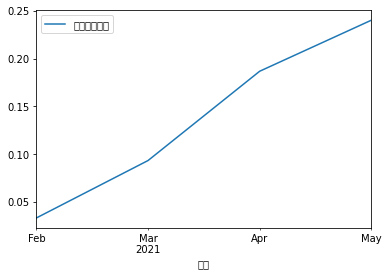

In [161]:
df.plot(x="日期", y="需求彈性價格")